In [1]:
import os
import sys
import rootpath
sys.path.append(rootpath.detect())

from testsuite.utilities import Pareto_split, dominates
from testsuite.analysis import load_all #, plot_all_pareto_2d, PLOT_STYLE, plot_measure
from problem_setup import func, y, weighting, n_obj, n_dim

import pickle
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import wfg

In [2]:
M = 2                                   # Number of objectives
kfactor = 1
lfactor = 2
k = kfactor*(M-1)   # position related params
l = lfactor*2           # distance related params

n_dim = k+l
n_obj = M
func = wfg.WFG5

In [3]:
N = 500
y = np.zeros((N, n_obj))
x = np.zeros((N, n_dim))
for n in range(N):
    z = wfg.random_soln(k, l, func.__name__)
    y[n,:] = func(z, k, M)
    x[n,:] = z

In [4]:
targets = np.array([[1.79, 1.79],[1.79*0.9, 1.79*0.9],[1.79*1.1, 1.79*1.1]])
targets.shape

(3, 2)

In [5]:
targets2 = np.array([[.985, 3.48], [0.985*0.9, 3.48*0.9], [0.985*1.1, 3.48*1.1]])
targets2.shape

(3, 2)

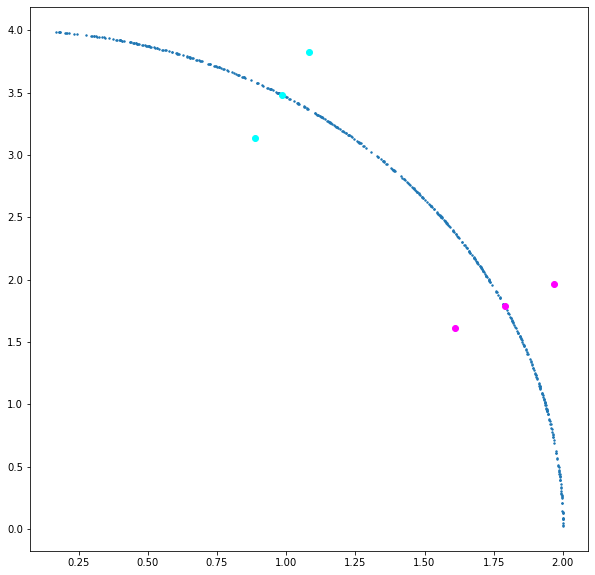

In [6]:
plt.figure(figsize=[10, 10])
plt.scatter(*y.T, s=2)
plt.scatter(*targets.T, c="magenta")
plt.scatter(*targets2.T, c="cyan")

In [7]:
p2 = np.load("../../comp/igd_refpoints/problem_refpoints/data/wfg_elipse_2d_refpoints")
p2 = p2[::20]
p2.shape

(250, 2)

In [8]:
from testsuite.utilities import get_target_igd_refpoints

In [9]:
# dom_inds = [dominates(targets[1:2], pi, maximize= False) for pi in p2]
target = targets[2]
igd_points, other_points = get_target_igd_refpoints(target, p2) 

In [10]:
igd_points

array([[1.90001817, 1.24894816],
       [1.90047894, 1.24612141],
       [1.84383666, 1.54956046],
       [1.89306473, 1.2904614 ],
       [1.94740287, 0.91133467],
       [1.79075817, 1.78123426],
       [1.92430141, 1.09014439],
       [1.94039825, 0.96930843],
       [1.82979061, 1.61490721],
       [1.84155732, 1.56041331],
       [1.91336219, 1.16458778],
       [1.89031005, 1.3064912 ],
       [1.83388927, 1.59611251],
       [1.83784313, 1.57777122],
       [1.78349267, 1.81021092],
       [1.89018852, 1.30721272],
       [1.79979713, 1.74445352],
       [1.92098975, 1.11321192],
       [1.83674069, 1.58292329],
       [1.89394954, 1.28528683],
       [1.81730077, 1.67029186],
       [1.92242283, 1.1032805 ],
       [1.8656922 , 1.44115667],
       [1.85007382, 1.51953321],
       [1.96460998, 0.74919541],
       [1.80122668, 1.73851896],
       [1.8534355 , 1.50304606],
       [1.87600034, 1.38657082],
       [1.91370623, 1.16233052],
       [1.89706198, 1.2667857 ],
       [1.

In [11]:
target

array([1.969, 1.969])

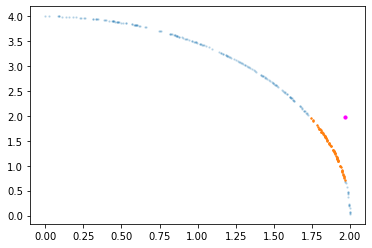

In [17]:
plt.scatter(*other_points.T, c="C0", s=2, alpha=0.2)
plt.scatter(*igd_points.T, c="C1", s=2)
plt.scatter(*target.T, c="magenta", s=10)

In [13]:
from problem_setup import func, objective_function, limits
from testsuite.surrogates import GP, MultiSurrogate
from testsuite.directed_optimisers import DirectedSaf

In [14]:
multi_surrogate = MultiSurrogate(GP, scaled=True)
budget=20
seed = 0
opt = DirectedSaf(objective_function=objective_function, ei=False,  targets=[[0.5, 4.]], w=0.5, limits=limits, surrogate=multi_surrogate, n_initial=10, budget=budget, seed=seed)

In [15]:
opt.optimise()

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 9.96185006553449
Optimization restart 2/10, f = 14.18938533204673
Optimization restart 3/10, f = 9.961850065535945
Optimization restart 4/10, f = 9.961850065537117
Optimization restart 5/10, f = 9.961850065536447
Optimization restart 6/10, f = 9.96185006553496
Optimization restart 7/10, f = 9.961850065534353
Optimization restart 8/10, f = 9.961850065534785
Optimization restart 9/10, f = 9.961850065535344


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 9.96185006553491
Optimization restart 1/10, f = 8.198011690460676
Optimization restart 2/10, f = 8.198011690458479
Optimization restart 3/10, f = 8.198011690454972
Optimization restart 4/10, f = 8.198011690458252
Optimization restart 5/10, f = 8.19801169045515
Optimization restart 6/10, f = 8.198011690453846
Optimization restart 7/10, f = 8.19801169045459
Optimization restart 8/10, f = 8.198011690497925
Optimization restart 9/10, f = 8.198011690454814
Optimization restart 10/10, f = 8.19801169045343
(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=606351, Thu May 20 16:37:27 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 -4.178763895101673e-01 1.0e+00 2.24e-01  2e-01  2e-01 0:00.0
    2     16 -4.317801190017653e-01 1.2e+00 2.55e-01  2e-01  3e-01 0:00.0
    3     24 -4.608222227817865e-01 1.5e+00 3.39e-01  3e-01  4e-01 0:00.1
  100    800 -5.322820939349422e-01 1.2e+01 5.56e-03  1e-04  2e-03 0:01.5
  152

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Thu May 20 16:37:30 2021)
final/bestever f-value = -5.322821e-01 -5.322821e-01
incumbent solution: [4.598466937710136e-14, 3.194946624410452, 1.1148261928634378e-13, 7.9999999999953095, 9.999999999998291]
std deviation: [2.0002145427765342e-07, 2.5740906621872915e-06, 3.060175763556047e-07, 2.030844928179679e-06, 1.7581587131416093e-06]
Optimization restart 1/10, f = 9.197943474261141
Optimization restart 2/10, f = 9.197943474259596
Optimization restart 3/10, f = 15.608323865251416
Optimization restart 4/10, f = 9.197943474259109
Optimization restart 5/10, f = 9.197943474260036
Optimization restart 6/10, f = 9.197943474263042


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 7/10, f = 9.197943474262312
Optimization restart 8/10, f = 9.197943474258933
Optimization restart 9/10, f = 9.197943474260326
Optimization restart 10/10, f = 15.608323865251402
Optimization restart 1/10, f = 8.050430929899331
Optimization restart 2/10, f = 8.050430929910002
Optimization restart 3/10, f = 8.05043092994434
Optimization restart 4/10, f = 15.6083238652514
Optimization restart 5/10, f = 8.050430929903104
Optimization restart 6/10, f = 8.050430929899317
Optimization restart 7/10, f = 8.050430929898518
Optimization restart 8/10, f = 15.608323865260292
Optimization restart 9/10, f = 8.050430929899584
Optimization restart 10/10, f = 8.05043092990001
(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=679733, Thu May 20 16:37:32 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 -4.517569520192809e-01 1.0e+00 2.41e-01  2e-01  3e-01 0:00.0
    2     16 -4.614115854614403e-01 1.3e+00 2.46e-01  2e-01  3e-01 0:00.0
   

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Thu May 20 16:37:36 2021)
final/bestever f-value = -5.012506e-01 -5.012506e-01
incumbent solution: [0.21170874202387027, 2.6042431060338007, 5.2293429155677695e-11, 5.045903409520523, 9.999999999997284]
std deviation: [3.085701592550005e-07, 1.0023532817880747e-05, 2.128032892333809e-06, 2.4716475009335714e-05, 1.2574434566043612e-05]
Optimization restart 1/10, f = 12.710606907649236
Optimization restart 2/10, f = 12.710606907649197
Optimization restart 3/10, f = 12.71060690765006
Optimization restart 4/10, f = 17.027262398456095
Optimization restart 5/10, f = 17.02726239845607
Optimization restart 6/10, f = 12.710606907649193
Optimization restart 7/10, f = 17.02726239845607


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 8/10, f = 10172572.092303693
Optimization restart 9/10, f = 17.027262398456077
Optimization restart 10/10, f = 10157496.852095809
Optimization restart 1/10, f = 10.193135931346555
Optimization restart 2/10, f = 10.193135931347555
Optimization restart 3/10, f = 10.193135931347218
Optimization restart 4/10, f = 10.19313593134887
Optimization restart 5/10, f = 17.027262398456074
Optimization restart 6/10, f = 10.193135931350998
Optimization restart 7/10, f = 10.193135931346363
Optimization restart 8/10, f = 10.193135931346255
Optimization restart 9/10, f = 17.027262398464245
Optimization restart 10/10, f = 10.193135931346333
(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=678413, Thu May 20 16:37:38 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 -4.314662251659106e-01 1.0e+00 2.47e-01  2e-01  3e-01 0:00.0
    2     16 -4.556815922533810e-01 1.4e+00 2.39e-01  2e-01  3e-01 0:00.0
    3     24 -4.581882014343341e-01 1.4

 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:
        geno-pheno transformation introduced based on the
        current covariance matrix with condition 1.0e+12 -> 1.0e+00,
        injected solutions become "invalid" in this iteration (class=CMAEvolutionStrategy method=alleviate_conditioning iteration=248)


  266   2128 -5.108994179388625e-01 3.0e+00 1.03e-04  5e-05  1e-04 0:03.4


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Thu May 20 16:37:42 2021)
final/bestever f-value = -5.108994e-01 -5.108994e-01
incumbent solution: [0.13558219908678382, 3.999999999998605, 2.8539588018218183, 7.999999999997311, 8.690859660806382]
std deviation: [4.595513292175081e-05, 0.00010239846306483698, 8.168683862056343e-05, 8.680432478046976e-05, 7.199535926057381e-05]
Optimization restart 1/10, f = 14.094453398181136
Optimization restart 2/10, f = 14.094453398240336
Optimization restart 3/10, f = 86.78028137272739
Optimization restart 4/10, f = 31.90121623172934
Optimization restart 5/10, f = 14.094453398180974
Optimization restart 6/10, f = 14.094453398183436
Optimization restart 7/10, f = 18.446200931660826


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 8/10, f = 31.901217100398576
Optimization restart 9/10, f = 14.094453398180873
Optimization restart 10/10, f = 86.78027836043816
Optimization restart 1/10, f = 11.78230448831755
Optimization restart 2/10, f = 18.446200931733262
Optimization restart 3/10, f = 11.782304488334956
Optimization restart 4/10, f = 28.500675546146724
Optimization restart 5/10, f = 18.446200931666553
Optimization restart 6/10, f = 18.44620093166074
Optimization restart 7/10, f = 11.782304488318747
Optimization restart 8/10, f = 11.78230448832128
Optimization restart 9/10, f = 11.782304488318992
Optimization restart 10/10, f = 18.446200931687315
(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=557960, Thu May 20 16:37:44 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 -4.737130261974022e-01 1.0e+00 2.31e-01  2e-01  2e-01 0:00.0
    2     16 -4.944585374093948e-01 1.3e+00 2.31e-01  2e-01  2e-01 0:00.0
    3     24 -4.934108959587288e-01 1.3e+0

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Thu May 20 16:37:48 2021)
final/bestever f-value = -5.004715e-01 -5.004715e-01
incumbent solution: [0.14706754952932072, 2.5300456586278877, 4.5425707053305815e-15, 7.999999999999057, 7.4416525004894085]
std deviation: [1.9481730197873548e-07, 2.3790663003269572e-06, 9.315483332336739e-07, 1.3709123622063315e-06, 4.057578146316136e-06]
Optimization restart 1/10, f = 14.835782177857569
Optimization restart 2/10, f = 14.83578217787601
Optimization restart 3/10, f = 14.835782177856839
Optimization restart 4/10, f = 19.865139464866832
Optimization restart 5/10, f = 19.865139464866058


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 6/10, f = 14.835782177857002
Optimization restart 7/10, f = 14554093.9504121
Optimization restart 8/10, f = 19.865139464865422
Optimization restart 9/10, f = 19.865139464867966
Optimization restart 10/10, f = 19.86513946486542
Optimization restart 1/10, f = 12.248761100220975
Optimization restart 2/10, f = 12.248761100203197
Optimization restart 3/10, f = 12.248761100204447
Optimization restart 4/10, f = 12.248761100203854
Optimization restart 5/10, f = 12.248761100203248
Optimization restart 6/10, f = 93.4556877196577
Optimization restart 7/10, f = 12.248761100203302
Optimization restart 8/10, f = 12.248761100203183
Optimization restart 9/10, f = 12.248761100203696
Optimization restart 10/10, f = 12.248761100203417
(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=605320, Thu May 20 16:37:49 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 -3.855712758029749e-01 1.0e+00 2.40e-01  2e-01  3e-01 0:00.0
    2     16 -4.1

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Thu May 20 16:37:52 2021)
final/bestever f-value = -4.857860e-01 -4.857860e-01
incumbent solution: [0.2633161065490136, 2.1907931219690644, 3.236269524824752, 3.3565466691485533, 6.364075861790397]
std deviation: [1.6045429532409733e-07, 4.508121192893151e-06, 2.9910669915560427e-06, 8.199486539909048e-06, 7.30068682511946e-06]
Optimization restart 1/10, f = 14.304881796609381
Optimization restart 2/10, f = 21.284077998070092
Optimization restart 3/10, f = 33.63487221805961
Optimization restart 4/10, f = 100.13109398534753
Optimization restart 5/10, f = 24068163.324497174
Optimization restart 6/10, f = 21.284077998070092
Optimization restart 7/10, f = 749178.1938840116
Optimization restart 8/10, f = 100.13109398534753
Optimization restart 9/10, f = 14.304881796344947


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 14.304881796347441
Optimization restart 1/10, f = 12.08394581100244
Optimization restart 2/10, f = 12.083945811001332
Optimization restart 3/10, f = 12.083945811004716
Optimization restart 4/10, f = 12.083945811000506
Optimization restart 5/10, f = 12.083945811001204
Optimization restart 6/10, f = 12.083945811728894
Optimization restart 7/10, f = 12.08394581101579
Optimization restart 8/10, f = 21.28407799807163
Optimization restart 9/10, f = 12.083945811001243
Optimization restart 10/10, f = 100.13108527429361
(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=674808, Thu May 20 16:37:54 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 -4.356260261428940e-01 1.0e+00 2.70e-01  3e-01  3e-01 0:00.0
    2     16 -4.570150144025552e-01 1.5e+00 3.82e-01  4e-01  5e-01 0:00.0
    3     24 -4.598570040228500e-01 1.5e+00 4.58e-01  4e-01  5e-01 0:00.1
  100    800 -4.970740048647430e-01 2.7e+01 3.06e-02  8e-04  1e-02 

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Thu May 20 16:37:58 2021)
final/bestever f-value = -4.970753e-01 -4.970753e-01
incumbent solution: [0.147762496242445, 1.5783255956795603, 3.824063358271074, 3.5007688298121495, 6.33655743578862]
std deviation: [1.1022238283932214e-07, 1.337145213952501e-06, 2.0524501252647034e-06, 3.416596673470413e-06, 1.6058032783833283e-06]
Optimization restart 1/10, f = 13.211696980769055
Optimization restart 2/10, f = 13.211696980777111
Optimization restart 3/10, f = 106.8064506804797
Optimization restart 4/10, f = 22.703016531274763
Optimization restart 5/10, f = 22.703016531274763
Optimization restart 6/10, f = 106.80650025103739
Optimization restart 7/10, f = 106.80650025103739
Optimization restart 8/10, f = 33.65812916256524


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 13.21169698076885
Optimization restart 10/10, f = 13.211696980762913
Optimization restart 1/10, f = 11.155317444815864
Optimization restart 2/10, f = 11.155317444618024
Optimization restart 3/10, f = 11.155317444619648
Optimization restart 4/10, f = 22.703016531274763
Optimization restart 5/10, f = 11.155317444663671
Optimization restart 6/10, f = 11.155317444618408
Optimization restart 7/10, f = 11.155317444618053
Optimization restart 8/10, f = 11.155317444632708
Optimization restart 9/10, f = 11.155317444618703
Optimization restart 10/10, f = 11.155317444618348
(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=671717, Thu May 20 16:37:59 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 -4.081555808573506e-01 1.0e+00 2.48e-01  2e-01  3e-01 0:00.0
    2     16 -4.467799855332004e-01 1.1e+00 3.17e-01  3e-01  3e-01 0:00.0
    3     24 -4.786812158905210e-01 1.4e+00 4.80e-01  4e-01  6e-01 0:00.0
  100    800 -4

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Thu May 20 16:38:03 2021)
final/bestever f-value = -4.936495e-01 -4.936495e-01
incumbent solution: [0.2116589775017748, 1.7625421802981416, 3.4987842212696023, 3.2094310174428093, 6.046542328509329]
std deviation: [1.6508665152962205e-07, 2.5095414662295194e-06, 3.7023438116168915e-06, 4.5865657989305285e-06, 8.041148169637573e-06]
Optimization restart 1/10, f = 10.707456851882442
Optimization restart 2/10, f = 24.121955064481405
Optimization restart 3/10, f = 24.121955064479437
Optimization restart 4/10, f = 10.707456851882268
Optimization restart 5/10, f = 10.707456851883038
Optimization restart 6/10, f = 24.121955064480233
Optimization restart 7/10, f = 24.121955064479437
Optimization restart 8/10, f = 10.70745685188221


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 113.48190651672722
Optimization restart 10/10, f = 24.121955064479437
Optimization restart 1/10, f = 8.722581525916203
Optimization restart 2/10, f = 8.722581525928824
Optimization restart 3/10, f = 8.722581525917848
Optimization restart 4/10, f = 8.722581525914567
Optimization restart 5/10, f = 8.722581525914203
Optimization restart 6/10, f = 8.72258152591773
Optimization restart 7/10, f = 16406905.368895354
Optimization restart 8/10, f = 8.722581525967662
Optimization restart 9/10, f = 8.722581525918478
Optimization restart 10/10, f = 24.12195506447953
(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=586688, Thu May 20 16:38:09 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 -4.115478117081857e-01 1.0e+00 2.94e-01  3e-01  3e-01 0:00.0
    2     16 -4.401960667445713e-01 1.3e+00 3.53e-01  3e-01  4e-01 0:00.0
    3     24 -4.557199555249969e-01 1.5e+00 4.41e-01  4e-01  5e-01 0:00.1
  100    800 -4.91017374

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Thu May 20 16:38:11 2021)
final/bestever f-value = -4.910174e-01 -4.910174e-01
incumbent solution: [0.19373767467992686, 1.7569857922099643, 3.4853045787880297, 3.1417619960224754, 5.930318442411637]
std deviation: [4.3937778973518705e-07, 6.785863554024259e-07, 8.935864990939752e-07, 1.3520558089460146e-06, 1.5954556903390423e-06]
Optimization restart 1/10, f = 8.549316220031539
Optimization restart 2/10, f = 8.549316220018273
Optimization restart 3/10, f = 8.549316220012226
Optimization restart 4/10, f = 8.549316220042368
Optimization restart 5/10, f = 8.549316220013175
Optimization restart 6/10, f = 34639815.56446515
Optimization restart 7/10, f = 25.540893597684107
Optimization restart 8/10, f = 25.540893597684132
Optimization restart 9/10, f = 120.15731278241705


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 25.540854504537048
Optimization restart 1/10, f = 8.366489093933989
Optimization restart 2/10, f = 8.366489093953053
Optimization restart 3/10, f = 8.366489093936533
Optimization restart 4/10, f = 8.366489093924482
Optimization restart 5/10, f = 19234205.8573039
Optimization restart 6/10, f = 8.366489093945454
Optimization restart 7/10, f = 25.540893597684107
Optimization restart 8/10, f = 25.54089359768411
Optimization restart 9/10, f = 25.540893597684107
Optimization restart 10/10, f = 8.366489093947845
(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=627937, Thu May 20 16:38:16 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 -4.749960316511298e-01 1.0e+00 2.22e-01  2e-01  2e-01 0:00.0
    2     16 -4.764290199762968e-01 1.3e+00 2.04e-01  2e-01  2e-01 0:00.0
    3     24 -4.790871435378314e-01 1.3e+00 2.50e-01  2e-01  3e-01 0:00.0
  100    800 -5.157873453928778e-01 2.2e+01 1.06e-02  4e-04  4e-03 0:01.4

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Thu May 20 16:38:19 2021)
final/bestever f-value = -5.157878e-01 -5.157878e-01
incumbent solution: [5.148301023868445e-14, 2.318600065357149, 3.5414414013550606, 0.9517427908121645, 4.577439725008782]
std deviation: [3.551206415743721e-07, 1.0780963428480966e-06, 2.277153335937606e-06, 2.207866981477597e-06, 2.277476249624913e-06]
Optimization restart 1/10, f = 8.043714304397303
Optimization restart 2/10, f = 8.043714304395447
Optimization restart 3/10, f = 126.8327190481069
Optimization restart 4/10, f = 26.959832130888778
Optimization restart 5/10, f = 26.959832130888778
Optimization restart 6/10, f = 8.04371430447174
Optimization restart 7/10, f = 26.95983213088878
Optimization restart 8/10, f = 8.043714304404709
Optimization restart 9/10, f = 26.95983213089354
Optimization restart 10/10, f = 8.043714304440934


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 9.436248176815784
Optimization restart 2/10, f = 26.95983213088878
Optimization restart 3/10, f = 9.43624817679836
Optimization restart 4/10, f = 26.95983213088878
Optimization restart 5/10, f = 9.436248176779642
Optimization restart 6/10, f = 29696209.683370773
Optimization restart 7/10, f = 9.436248176805602
Optimization restart 8/10, f = 126.8327190481069
Optimization restart 9/10, f = 9.436248176828148
Optimization restart 10/10, f = 9.436248176886345
(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=650430, Thu May 20 16:38:24 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 -4.808929532483500e-01 1.0e+00 2.39e-01  2e-01  2e-01 0:00.0
    2     16 -4.837135195699914e-01 1.2e+00 2.48e-01  2e-01  3e-01 0:00.0
    3     24 -4.842014506540202e-01 1.3e+00 2.75e-01  3e-01  3e-01 0:00.0
  100    800 -4.996732026108268e-01 7.5e+02 6.43e-03  8e-05  4e-03 0:01.7
  200   1600 -4.996733752360637e-01 3.1e+05 4.73e-0

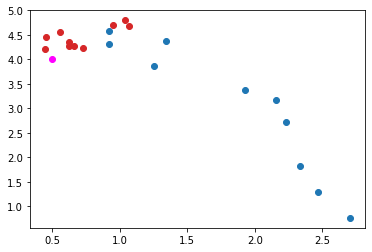

In [16]:
plt.scatter(*opt.y[:10].T)
plt.scatter(*opt.y[10:].T, c="C3")
plt.scatter(*opt.targets.T, c="magenta")


In [50]:
from testsuite.surrogates import RF
multi_surrogate = MultiSurrogate(RF)
opt = DirectedSaf(objective_function=objective_function, ei=False,  targets=[[0.5, 4.]], w=0.5, limits=limits, surrogate=multi_surrogate, n_initial=10, budget=budget, seed=10)

In [51]:
opt.optimise(25)

(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=458104, Wed Mar 10 18:29:47 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 -5.451930187592862e-01 1.0e+00 2.15e-01  2e-01  2e-01 0:00.3
    2     16 -5.489903486064025e-01 1.2e+00 2.38e-01  2e-01  3e-01 0:00.5
    3     24 -5.499648453975744e-01 1.5e+00 3.18e-01  3e-01  4e-01 0:00.8
   16    128 -5.526427453302549e-01 2.6e+00 3.80e-01  2e-01  4e-01 0:03.9
   33    264 -5.575519500160546e-01 6.3e+00 9.02e-01  2e-01  1e+00 0:08.1
   54    432 -5.611618122556548e-01 1.7e+01 4.77e-01  5e-02  6e-01 0:13.1
   80    640 -5.627524070733331e-01 5.9e+01 1.27e-01  2e-03  1e-01 0:19.3
  100    800 -5.627524070733331e-01 2.0e+02 5.89e-02  3e-04  6e-02 0:24.1


 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.562752, sigma=6.72e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=104)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.562752, sigma=6.61e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=105)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.562752, sigma=5.36e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness mo

  118    944 -5.627524070733331e-01 4.7e+02 3.78e-02  1e-04  4e-02 0:28.6


 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.562752, sigma=3.78e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=118)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.562752, sigma=3.78e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=118)


termination on tolfun=1e-11 (Wed Mar 10 18:30:15 2021)
termination on tolfunhist=1e-12 (Wed Mar 10 18:30:15 2021)
termination on flat fitness=please (re)consider how to compute the fitness more elaborately if sigma=3.78e-02 is large (Wed Mar 10 18:30:15 2021)
final/bestever f-value = -5.627524e-01 -5.629810e-01
incumbent solution: [0.2564841040654453, 0.2813942040752334, 5.932446021760877, 1.0290769113549454, 6.470398092934087]
std deviation: [0.00011819665450041317, 0.03247782641040201, 0.026162623390817544, 0.03519096389048729, 0.00493632047737218]
(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=456277, Wed Mar 10 18:30:16 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 -4.735091697726843e-01 1.0e+00 2.66e-01  3e-01  3e-01 0:00.3
    2     16 -5.033336522523408e-01 1.4e+00 3.42e-01  3e-01  4e-01 0:00.5
    3     24 -5.237049372160109e-01 1.6e+00 4.41e-01  4e-01  5e-01 0:00.7
   17    136 -5.319086711371394e-01 5.1e+00 5.69e-01  2e-01

 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.559973, sigma=1.44e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=137)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.559973, sigma=1.21e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=141)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.559973, sigma=1.30e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness mo

  154   1232 -5.599731227503302e-01 3.5e+01 8.49e-03  5e-05  1e-03 0:36.5


 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.559973, sigma=8.49e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=154)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.559973, sigma=8.49e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=154)


termination on tolfun=1e-11 (Wed Mar 10 18:30:52 2021)
termination on tolfunhist=1e-12 (Wed Mar 10 18:30:52 2021)
termination on flat fitness=please (re)consider how to compute the fitness more elaborately if sigma=8.49e-03 is large (Wed Mar 10 18:30:52 2021)
final/bestever f-value = -5.599731e-01 -5.599731e-01
incumbent solution: [0.25351842308149, 0.8816647093618202, 4.199688178191985, 1.5179755663228598, 6.609246012617467]
std deviation: [5.040592358997401e-05, 0.0014768097511441132, 0.0013479385743152782, 0.0010065139159107328, 0.0009169148036568119]
(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=421915, Wed Mar 10 18:30:53 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 -5.005112004403007e-01 1.0e+00 2.78e-01  3e-01  3e-01 0:00.3
    2     16 -5.141979563821164e-01 1.4e+00 2.83e-01  3e-01  3e-01 0:00.7
    3     24 -5.180161512568460e-01 1.6e+00 3.03e-01  3e-01  4e-01 0:01.0
   13    104 -5.404135339872466e-01 3.1e+00 5.36e-01  4

 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.545192, sigma=1.92e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=82)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.545192, sigma=2.11e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=83)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.545278, sigma=1.62e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more

  100    800 -5.452776490122765e-01 3.4e+02 1.38e-02  1e-04  3e-02 0:24.7


 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.545278, sigma=1.38e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=100)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.545278, sigma=1.38e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=101)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.545278, sigma=1.72e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness mo

  114    912 -5.452776490122765e-01 2.4e+02 1.39e-02  1e-04  2e-02 0:28.1


 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.545278, sigma=1.39e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=114)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.545278, sigma=1.39e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=114)


termination on tolfun=1e-11 (Wed Mar 10 18:31:21 2021)
termination on tolfunhist=1e-12 (Wed Mar 10 18:31:21 2021)
termination on flat fitness=please (re)consider how to compute the fitness more elaborately if sigma=1.39e-02 is large (Wed Mar 10 18:31:21 2021)
final/bestever f-value = -5.452776e-01 -5.452776e-01
incumbent solution: [0.2533465543237551, 0.8798596709212932, 0.35533337563482814, 1.9740827554025826, 6.6265961343206605]
std deviation: [0.00013966113192648595, 0.002861803779118367, 0.022941784811128428, 0.0044652444159777255, 0.0028655645596771884]
(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=535217, Wed Mar 10 18:31:21 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 -4.631883340752457e-01 1.0e+00 2.44e-01  2e-01  3e-01 0:00.3
    2     16 -4.723928847465564e-01 1.2e+00 2.54e-01  2e-01  3e-01 0:00.5
    3     24 -4.966708593324531e-01 1.3e+00 3.17e-01  3e-01  3e-01 0:00.8
   17    136 -5.291677734649867e-01 4.7e+00 1.22e+0

 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.556753, sigma=6.57e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=150)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.556753, sigma=5.30e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=155)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.556753, sigma=4.91e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness mo

  159   1272 -5.567531094104650e-01 6.6e+02 3.73e-03  4e-06  2e-03 0:37.0
termination on tolfunhist=1e-12 (Wed Mar 10 18:31:58 2021)
termination on flat fitness=please (re)consider how to compute the fitness more elaborately if sigma=3.73e-03 is large (Wed Mar 10 18:31:58 2021)
final/bestever f-value = -5.567531e-01 -5.567531e-01
incumbent solution: [0.2537944620433098, 0.8714968776451569, 4.163221536532792, 1.5201165256679796, 6.9868600172313124]
std deviation: [4.365321817919322e-06, 0.00018202469768689128, 0.0021824772957084286, 0.0005044267579631591, 0.0013995878447978596]
(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=505285, Wed Mar 10 18:31:59 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 -4.849247942003815e-01 1.0e+00 2.71e-01  3e-01  3e-01 0:00.2
    2     16 -5.030508717484541e-01 1.4e+00 3.22e-01  3e-01  5e-01 0:00.5
    3     24 -5.215067604220367e-01 1.7e+00 3.71e-01  3e-01  6e-01 0:00.7
   15    120 -5.268407002620552e

 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.540920, sigma=1.03e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=154)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.540920, sigma=6.87e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=161)


  162   1296 -5.409195382393004e-01 5.5e+01 6.42e-03  8e-05  3e-03 0:48.0


 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.540920, sigma=6.42e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=162)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.540920, sigma=6.42e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=162)


termination on tolfun=1e-11 (Wed Mar 10 18:32:47 2021)
termination on tolfunhist=1e-12 (Wed Mar 10 18:32:47 2021)
termination on flat fitness=please (re)consider how to compute the fitness more elaborately if sigma=6.42e-03 is large (Wed Mar 10 18:32:47 2021)
final/bestever f-value = -5.409195e-01 -5.431875e-01
incumbent solution: [0.24564068193057192, 0.874417584975041, 4.0181281247912395, 1.5191180452589483, 1.3960758480885668e-05]
std deviation: [0.0001930553927804274, 8.164344603439231e-05, 0.00158748454461349, 0.0003884925458051691, 0.0030330240440797525]
(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=560653, Wed Mar 10 18:32:47 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 -5.181316920956096e-01 1.0e+00 2.80e-01  3e-01  3e-01 0:00.4
    2     16 -5.196808244437727e-01 1.4e+00 3.46e-01  3e-01  4e-01 0:00.7
    3     24 -5.198882757181079e-01 1.7e+00 4.08e-01  4e-01  5e-01 0:01.1
   10     80 -5.327070554066262e-01 3.7e+00 8.28e

 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.560025, sigma=3.10e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=170)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.560025, sigma=3.19e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=182)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.560025, sigma=2.83e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness mo

  188   1504 -5.600249563550732e-01 1.9e+03 2.76e-03  6e-07  8e-04 1:00.3


 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.560025, sigma=2.76e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=188)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.560025, sigma=2.16e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=190)


  191   1528 -5.600249563550732e-01 1.7e+03 2.32e-03  5e-07  6e-04 1:02.2


 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.560025, sigma=2.32e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=191)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.560025, sigma=2.32e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=191)


termination on tolfun=1e-11 (Wed Mar 10 18:33:50 2021)
termination on tolfunhist=1e-12 (Wed Mar 10 18:33:50 2021)
termination on flat fitness=please (re)consider how to compute the fitness more elaborately if sigma=2.32e-03 is large (Wed Mar 10 18:33:50 2021)
final/bestever f-value = -5.600250e-01 -5.600250e-01
incumbent solution: [0.2537914968527612, 1.0481071119674918, 4.196982238131732, 1.5181043675330752, 6.612233703765478]
std deviation: [5.016981156943475e-07, 0.00046426878449042113, 0.0005645306966666431, 4.5549654902247e-05, 0.0006423656810338539]
(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=444539, Wed Mar 10 18:33:51 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 -4.780625903475989e-01 1.0e+00 2.72e-01  3e-01  3e-01 0:00.4
    2     16 -4.697352666541329e-01 1.3e+00 2.39e-01  2e-01  2e-01 0:01.1
    3     24 -4.779574382497439e-01 1.3e+00 2.70e-01  3e-01  3e-01 0:01.8
    8     64 -5.280719104391514e-01 2.5e+00 5.26e-01  

 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.548464, sigma=7.86e-04).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=186)


  198   1584 -5.484796612784887e-01 1.3e+03 5.79e-04  1e-07  1e-04 1:11.5
  200   1600 -5.484796612784887e-01 1.5e+03 4.25e-04  8e-08  1e-04 1:12.3


 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.548480, sigma=7.37e-04).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=213)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.548480, sigma=6.33e-04).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=217)


  218   1744 -5.484796612784887e-01 3.7e+03 6.26e-04  3e-08  1e-04 1:17.8
termination on tolfunhist=1e-12 (Wed Mar 10 18:35:09 2021)
termination on flat fitness=please (re)consider how to compute the fitness more elaborately if sigma=6.26e-04 is large (Wed Mar 10 18:35:09 2021)
final/bestever f-value = -5.484797e-01 -5.484797e-01
incumbent solution: [0.2537959896051462, 0.8817480214540648, 4.197626480207257, 1.5191253993443352, 4.1161514036921805]
std deviation: [3.483595463647482e-08, 8.457797511014478e-05, 8.856782256342714e-05, 4.4525065103163743e-05, 0.00011761044114321695]
(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=553222, Wed Mar 10 18:35:09 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 -4.976661495718937e-01 1.0e+00 2.61e-01  2e-01  3e-01 0:00.3
    2     16 -5.011989814451070e-01 1.5e+00 2.80e-01  2e-01  3e-01 0:00.6
    3     24 -5.158498354207259e-01 1.6e+00 4.01e-01  4e-01  6e-01 0:00.9
   14    112 -5.365975135096667

 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.560762, sigma=1.52e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=168)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.560762, sigma=1.40e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=170)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.560762, sigma=1.38e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness mo

  180   1440 -5.607617068441785e-01 2.1e+03 1.03e-03  2e-07  4e-04 1:13.9


 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.560762, sigma=1.03e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=180)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.560762, sigma=1.03e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=180)


termination on tolfun=1e-11 (Wed Mar 10 18:36:24 2021)
termination on tolfunhist=1e-12 (Wed Mar 10 18:36:24 2021)
termination on flat fitness=please (re)consider how to compute the fitness more elaborately if sigma=1.03e-03 is large (Wed Mar 10 18:36:24 2021)
final/bestever f-value = -5.607617e-01 -5.607617e-01
incumbent solution: [0.253796165022233, 0.8740926004633361, 4.179098548979758, 1.508668869349783, 7.061754407938322]
std deviation: [2.451646743573721e-07, 7.7658523285943e-05, 0.00039661747415602373, 0.00015785543789259473, 0.00020367787124149497]
(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=442901, Wed Mar 10 18:36:24 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 -5.310904642903086e-01 1.0e+00 2.66e-01  3e-01  3e-01 0:00.3
    2     16 -5.327715460259241e-01 1.4e+00 3.30e-01  3e-01  4e-01 0:00.7
    3     24 -5.319569311239880e-01 1.4e+00 3.28e-01  3e-01  4e-01 0:01.0
   12     96 -5.337953165405193e-01 3.1e+00 2.69e-01  

 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.535868, sigma=1.45e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=67)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.535868, sigma=1.86e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=70)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.535868, sigma=2.15e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more

   84    672 -5.358683865067648e-01 3.2e+01 1.54e-02  3e-04  8e-03 0:33.4


 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.535868, sigma=1.54e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=84)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.535868, sigma=1.54e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=84)


termination on tolfun=1e-11 (Wed Mar 10 18:36:57 2021)
termination on tolfunhist=1e-12 (Wed Mar 10 18:36:57 2021)
termination on flat fitness=please (re)consider how to compute the fitness more elaborately if sigma=1.54e-02 is large (Wed Mar 10 18:36:57 2021)
final/bestever f-value = -5.358684e-01 -5.358684e-01
incumbent solution: [0.2670576985076394, 1.870358088862097, 4.184641442793307, 6.692078344922889, 3.2872542521525205]
std deviation: [0.00034244758578462774, 0.005733554412489306, 0.008256837811247733, 0.003451573137538534, 0.007633472283528806]
(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=467895, Wed Mar 10 18:36:58 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 -5.004034787540853e-01 1.0e+00 2.34e-01  2e-01  2e-01 0:00.3
    2     16 -5.054561270097983e-01 1.2e+00 2.57e-01  2e-01  3e-01 0:00.6
    3     24 -5.130688125786393e-01 1.5e+00 2.54e-01  2e-01  3e-01 0:00.9
   13    104 -5.286137845284358e-01 3.6e+00 4.69e-01  3e-

 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.551660, sigma=4.24e-04).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=232)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.551660, sigma=4.08e-04).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=236)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.551660, sigma=2.48e-04).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness mo

  243   1944 -5.516599873789657e-01 1.6e+03 2.53e-04  7e-08  5e-05 1:16.9


 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.551660, sigma=2.53e-04).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=243)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.551660, sigma=2.27e-04).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=244)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.551660, sigma=2.74e-04).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness mo

  250   2000 -5.516599873789657e-01 2.0e+03 5.47e-04  2e-07  1e-04 1:18.7


 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.551660, sigma=5.47e-04).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=250)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.551660, sigma=5.47e-04).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=250)


termination on tolfun=1e-11 (Wed Mar 10 18:38:17 2021)
termination on tolfunhist=1e-12 (Wed Mar 10 18:38:17 2021)
termination on flat fitness=please (re)consider how to compute the fitness more elaborately if sigma=5.47e-04 is large (Wed Mar 10 18:38:17 2021)
final/bestever f-value = -5.516600e-01 -5.516600e-01
incumbent solution: [0.2538157307680192, 0.8737681427841687, 1.994580201251497, 1.518577572876166, 9.692290639283236]
std deviation: [1.5147886961092763e-07, 1.2239366421627652e-06, 0.00011198122518425428, 4.064854650019491e-05, 0.00010109212294680244]
(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=460741, Wed Mar 10 18:38:17 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 -4.457614451621197e-01 1.0e+00 2.06e-01  2e-01  2e-01 0:00.2
    2     16 -4.511018196713353e-01 1.2e+00 2.09e-01  2e-01  2e-01 0:00.5
    3     24 -4.555674537117212e-01 1.4e+00 2.34e-01  2e-01  3e-01 0:00.8
   14    112 -5.347278825065627e-01 3.2e+00 6.63e-

 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.560307, sigma=1.47e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=255)


NOTE (module=cma, iteration=258):  
condition in coordinate system exceeded 1.1e+08, rescaled to 1.0e+00, 
condition changed from 1.1e+08 to 6.3e+00


 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.560307, sigma=1.08e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=261)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.560307, sigma=1.04e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=263)


  266   2128 -5.603071241321781e-01 2.7e+00 8.41e-04  1e-08  2e-04 1:14.4
termination on tolfunhist=1e-12 (Wed Mar 10 18:39:32 2021)
termination on flat fitness=please (re)consider how to compute the fitness more elaborately if sigma=8.41e-04 is large (Wed Mar 10 18:39:32 2021)
final/bestever f-value = -5.603071e-01 -5.603071e-01
incumbent solution: [0.25379596967426926, 0.8727956501047529, 4.196172459441305, 1.5249878610920407, 6.673092575810013]
std deviation: [1.1193216859101197e-08, 1.2152037949820984e-05, 2.9936834579778522e-05, 1.4665680779821363e-05, 0.00015369890200001612]
(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=532633, Wed Mar 10 18:39:32 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 -4.756997404661263e-01 1.0e+00 2.61e-01  2e-01  3e-01 0:00.2
    2     16 -4.865059831915826e-01 1.4e+00 2.71e-01  3e-01  3e-01 0:00.5
    3     24 -5.034410657947074e-01 1.4e+00 2.94e-01  3e-01  3e-01 0:00.7
   16    128 -5.451510848195

 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.550989, sigma=1.06e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=138)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.550989, sigma=1.13e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=139)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.550989, sigma=9.36e-04).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness mo

  151   1208 -5.509892787756423e-01 7.1e+02 7.39e-04  1e-06  5e-04 0:37.9


 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.550989, sigma=7.39e-04).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=151)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.550989, sigma=7.39e-04).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=151)


termination on tolfun=1e-11 (Wed Mar 10 18:40:10 2021)
termination on tolfunhist=1e-12 (Wed Mar 10 18:40:10 2021)
termination on flat fitness=please (re)consider how to compute the fitness more elaborately if sigma=7.39e-04 is large (Wed Mar 10 18:40:10 2021)
final/bestever f-value = -5.509893e-01 -5.510303e-01
incumbent solution: [0.25380856093840487, 2.7203052290628795, 4.15906021430269, 1.526982878037029, 6.766260050118563]
std deviation: [1.3519703432339548e-06, 0.0003789301728774511, 0.000492520502193708, 2.4817783526185596e-05, 9.108471009354921e-05]
(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=525788, Wed Mar 10 18:40:10 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 -4.828321755947813e-01 1.0e+00 2.45e-01  2e-01  3e-01 0:00.3
    2     16 -5.088737677865042e-01 1.3e+00 2.77e-01  3e-01  3e-01 0:00.6
    3     24 -5.182649608782357e-01 1.5e+00 3.27e-01  3e-01  4e-01 0:01.0
   15    120 -5.277496379309441e-01 2.8e+00 2.22e-01 

 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.534569, sigma=7.92e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=126)


  133   1064 -5.345692279794965e-01 1.5e+03 8.42e-03  1e-05  1e-02 0:32.3


 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.534569, sigma=8.42e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=133)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.534569, sigma=7.91e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=136)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.534569, sigma=7.51e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness mo

  168   1344 -5.345692279794965e-01 2.3e+03 7.13e-03  6e-06  6e-03 0:40.7


 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.534569, sigma=7.13e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=168)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.534569, sigma=7.13e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=168)


termination on tolfun=1e-11 (Wed Mar 10 18:40:51 2021)
termination on tolfunhist=1e-12 (Wed Mar 10 18:40:51 2021)
termination on flat fitness=please (re)consider how to compute the fitness more elaborately if sigma=7.13e-03 is large (Wed Mar 10 18:40:51 2021)
final/bestever f-value = -5.345692e-01 -5.345703e-01
incumbent solution: [0.25382452387345117, 1.7990307638614425, 4.044036339873672, 7.787362867903926, 7.00833566714591]
std deviation: [6.259539251964935e-06, 0.002497790052813458, 0.0006355945000284976, 0.005664495762603334, 0.002431715661734691]
(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=572832, Wed Mar 10 18:40:51 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 -4.545061592087885e-01 1.0e+00 2.47e-01  2e-01  3e-01 0:00.2
    2     16 -4.736935967465924e-01 1.3e+00 3.07e-01  3e-01  3e-01 0:00.5
    3     24 -4.926642906945016e-01 1.4e+00 3.98e-01  4e-01  5e-01 0:00.8
   14    112 -5.253455654778684e-01 2.6e+00 1.04e+00  5e-

 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.561054, sigma=2.01e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=147)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.561054, sigma=2.00e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=148)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.561054, sigma=1.96e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness mo

  156   1248 -5.610535999140585e-01 7.1e+02 1.31e-03  2e-06  8e-04 0:40.5


 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.561054, sigma=1.31e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=156)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.561054, sigma=1.31e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=156)


termination on tolfun=1e-11 (Wed Mar 10 18:41:32 2021)
termination on tolfunhist=1e-12 (Wed Mar 10 18:41:32 2021)
termination on flat fitness=please (re)consider how to compute the fitness more elaborately if sigma=1.31e-03 is large (Wed Mar 10 18:41:32 2021)
final/bestever f-value = -5.610536e-01 -5.610536e-01
incumbent solution: [0.2538058650742369, 2.844516718898325, 4.166252687460784, 1.526910157175943, 6.714647851516139]
std deviation: [1.5739138414273684e-06, 0.0003517848041733092, 7.50302461619784e-05, 5.869730014660132e-05, 0.0008217519223108781]
(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=544425, Wed Mar 10 18:41:32 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 -5.188704726921862e-01 1.0e+00 2.47e-01  2e-01  3e-01 0:00.3
    2     16 -5.318518981539395e-01 1.2e+00 2.91e-01  3e-01  3e-01 0:00.5
    3     24 -5.345748682659072e-01 1.5e+00 3.17e-01  3e-01  4e-01 0:00.8
   14    112 -5.390089861548195e-01 1.8e+00 2.51e-01  2

 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.558414, sigma=1.98e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=137)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.558414, sigma=1.63e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=147)


  150   1200 -5.584135225645228e-01 2.0e+03 1.41e-03  6e-07  1e-03 1:12.3


 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.558414, sigma=1.41e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=150)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.558414, sigma=1.40e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=151)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.558414, sigma=1.24e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness mo

  154   1232 -5.584135225645228e-01 2.6e+03 1.23e-03  5e-07  9e-04 1:14.3
termination on tolfunhist=1e-12 (Wed Mar 10 18:42:47 2021)
termination on flat fitness=please (re)consider how to compute the fitness more elaborately if sigma=1.23e-03 is large (Wed Mar 10 18:42:47 2021)
final/bestever f-value = -5.584135e-01 -5.584135e-01
incumbent solution: [0.25380191195022406, 3.999476223797671, 4.165099646262956, 1.527643578610502, 7.07376920420163]
std deviation: [4.5591344892576156e-07, 0.0008990800255547341, 0.00018955557609697904, 8.73042485855511e-05, 0.0006026382077634079]
(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=577853, Wed Mar 10 18:42:48 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 -5.232809210982294e-01 1.0e+00 2.58e-01  2e-01  3e-01 0:00.4
    2     16 -5.332691195477652e-01 1.3e+00 2.98e-01  3e-01  4e-01 0:01.0
    3     24 -5.324097585252026e-01 1.6e+00 3.26e-01  3e-01  4e-01 0:01.8
    7     56 -5.379202920382152e-01

 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.560119, sigma=1.47e-04).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=174)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.560119, sigma=1.36e-04).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=181)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.560119, sigma=1.36e-04).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness mo

  193   1544 -5.601192316787729e-01 1.6e+03 7.59e-05  1e-08  2e-05 1:15.3


 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.560119, sigma=7.59e-05).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=193)
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:flat fitness (f=-0.560119, sigma=7.59e-05).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=193)


termination on tolfun=1e-11 (Wed Mar 10 18:44:03 2021)
termination on tolfunhist=1e-12 (Wed Mar 10 18:44:03 2021)
termination on flat fitness=please (re)consider how to compute the fitness more elaborately if sigma=7.59e-05 is large (Wed Mar 10 18:44:03 2021)
final/bestever f-value = -5.601192e-01 -5.601192e-01
incumbent solution: [0.2538040420091965, 2.7720747036316924, 4.1783555758137, 1.5270089189610099, 6.7530874362123665]
std deviation: [1.4724102112038366e-08, 1.245674026938659e-05, 1.1118385516788315e-05, 5.725532467696816e-07, 1.8565360675015454e-05]
(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=447648, Wed Mar 10 18:44:04 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 -5.123320889364935e-01 1.0e+00 2.43e-01  2e-01  2e-01 0:00.3
    2     16 -5.168293373936842e-01 1.2e+00 3.19e-01  3e-01  4e-01 0:00.6
    3     24 -5.211985667316867e-01 1.6e+00 4.01e-01  4e-01  4e-01 0:00.9
   12     96 -5.313351512370896e-01 2.3e+00 8.77e-0

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3417, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-51-49f3d71584d3>", line 1, in <module>
    opt.optimise(25)
  File "/home/finley/phd/code/testsuite/testsuite/optimisers.py", line 112, in optimise
    self.step()
  File "/home/finley/phd/code/testsuite/testsuite/optimisers.py", line 27, in wrapper
    return_value = f(self, *args, **kwargs)
  File "/home/finley/phd/code/testsuite/testsuite/optimisers.py", line 123, in step
    x_new = self.get_next_x()
  File "/home/finley/phd/code/testsuite/testsuite/optimisers.py", line 498, in get_next_x
    res = cma.fmin(self.alpha, seed,
  File "/home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/evolution_strategy.py", line 4149, in fmin
    X, fit = es.ask_and_eval(parallel_objective or objective_function,
  File "/home/finley/minico

TypeError: object of type 'NoneType' has no len()

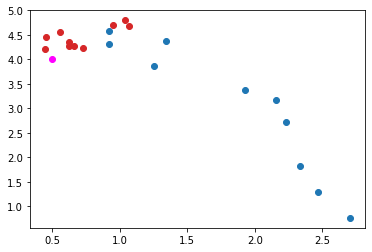

In [18]:
plt.scatter(*opt.y[:10].T)
plt.scatter(*opt.y[10:].T, c="C3")
plt.scatter(*opt.targets.T, c="magenta")

In [14]:
M = 3                                   # Number of objectives
kfactor = 1
lfactor = 2
k = kfactor*(M-1)   # position related params
l = lfactor*2           # distance related params

n_dim = k+l
n_obj = M
func = wfg.WFG6

In [15]:
N = 500
y = np.zeros((N, n_obj))
x = np.zeros((N, n_dim))
for n in range(N):
    z = wfg.random_soln(k, l, func.__name__)
    y[n,:] = func(z, k, M)
    x[n,:] = z

In [53]:
%matplotlib qt

In [90]:
t1 = np.array([1.73, 1.63, 1.72])
t2= np.array([0.51, 3.67, 1.83])
targets = np.array([t1, t1*0.9, t1*1.1, t2, t2*0.9, t2*1.1])

In [91]:
fig = plt.figure(figsize=[10,10])
ax = fig.gca(projection='3d')
ax.scatter(*y.T, s=5, c="C0")
ax.scatter(*targets.T, s=25, c="magenta")
# ax.scatter(*t2.T, s=25, c="cyan")

In [59]:
t = np.array([[1.79, 1.79, 1.79]])
t2 = t/(np.linalg.norm(t)*np.array([2, 4, 6]))

print(t)
print(t2)

[[1.79 1.79 1.79]]
[[0.28867513 0.14433757 0.09622504]]


In [82]:
np.argmin(np.linalg.norm(y-t2, axis=1))

392